# Test Sheet: Predicting Employee Salaries Based on Experience and Education Using Linear Regression

- Objective
In this assignment, you will build and evaluate a Linear Regression model to predict employee salaries based on their years of experience and education level. You will use Python's Scikit-Learn library to train the model, assess its performance, and make salary predictions.<br><br>

- Scenario
A company wants to determine an employee's salary based on their years of experience and education level. The company has historical data on employees’ salaries, experience, and education. Your task is to create a model that accurately predicts employee salaries using this information.<br><br>

- Features (Inputs):
    - Years of Experience: (e.g., 1, 5, 10, etc.)<br>
    - Education Level:<br>
        - 1 for Bachelor's<br>
        - 2 for Master's<br>
        - 3 for PhD<br>
- Target (Output):<br>
Salary: (continuous value in dollars)<br>


## Instructions
### 1. Generate or Load Data:
- Generate a synthetic dataset with the following columns:
    - experience: Years of experience (integer values, e.g., 1 to 20).
    - education_level: Education level (1 for Bachelor's, 2 for Master's, 3 for PhD).
    - salary: Continuous salary value (target variable).

In [7]:
import numpy as np
import pandas as pd
import random
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Data Preprocessing:
- Split the dataset into features (experience, education_level) and target (salary).
- Perform an 80/20 split to create training and test datasets.

In [24]:
experience = [] 

random.seed(42)
for i in range(0,10):
    n=random.randint(1,20)
    experience.append(n)
    
print(experience)



[4, 1, 9, 8, 8, 5, 4, 18, 3, 19]


In [28]:
education_lvl = []

random.seed(42)
for i in range(0,10):
    e=random.randint(1,3)
    education_lvl.append(e)
    
print(education_lvl)

[3, 1, 1, 3, 2, 1, 1, 1, 3, 1]


In [36]:
salary = []

random.seed(42)
for i in range(0,10):
    s=random.randint(30000,100000)
    salary.append(s)
    
print(salary)

[44592, 33278, 66048, 62098, 59256, 48289, 43434, 41395, 85302, 34165]


In [70]:
df = pd.DataFrame({
    'experience': experience,
    'education_level': education_lvl,
    'salary': salary
})

df

,experience,education_level,salary
0,4,3,44592
1,1,1,33278
2,9,1,66048
3,8,3,62098
4,8,2,59256
5,5,1,48289
6,4,1,43434
7,18,1,41395
8,3,3,85302
9,19,1,34165


### 3. Train the Linear Regression Model:
Train a Linear Regression model on the training data.

In [73]:
X = df[['experience', 'education_level']]  # Features
y = df['salary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4. Evaluate the Model:
Evaluate the model on the test data using 
- Mean Squared Error (MSE) and 
- R-squared (R²) values.

In [77]:
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 605309914.3099235
R-squared: 0.10539711052651479


### 5. Make Predictions:
- Use the trained model to predict the salary of a new employee.
- Example: Predict the salary for an employee with 7 years of experience and a Master's degree (education level = 2).

In [79]:
new_employee = np.array([[7, 2]])  # 7 years of experience, Master's degree
predicted_salary = model.predict(new_employee)

print(f"Predicted Salary for 7 years experience and Master's degree: ${predicted_salary[0]:,.2f}")


Predicted Salary for 7 years experience and Master's degree: $52,276.48


C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 6. Visualizations (Optional):
- Create scatter plots to visualize the relationship between experience, education, and salary.
- Plot the model's predictions against the actual salary data.


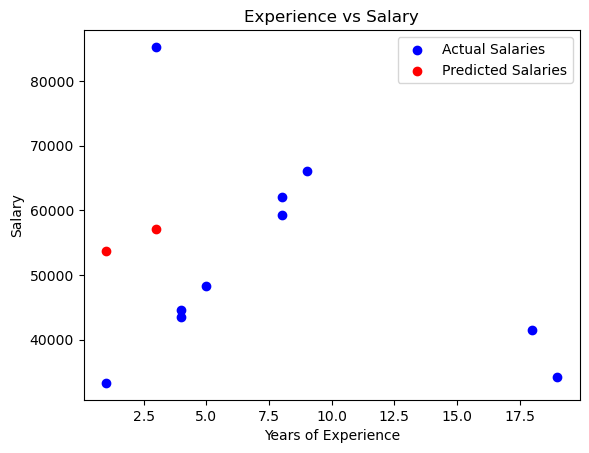

In [81]:
plt.scatter(df['experience'], df['salary'], color='blue', label='Actual Salaries')
plt.scatter(X_test['experience'], y_pred, color='red', label='Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()